# Face Recognition 
<!--<badge>--><a href="https://colab.research.google.com/github/TheAIDojo/Machine_Learning_Bootcamp/blob/main/Week 06 – Computer Vision Applications/4- Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->




A facial recognition system is a technology capable of matching a human face from a digital image or a video frame against a database of faces, typically employed to authenticate users through ID verification services, works by pinpointing and measuring facial features from a given image. 

CNN model have the power to automat the face recognition by learning the features of face.

# Siamese Neural Network 

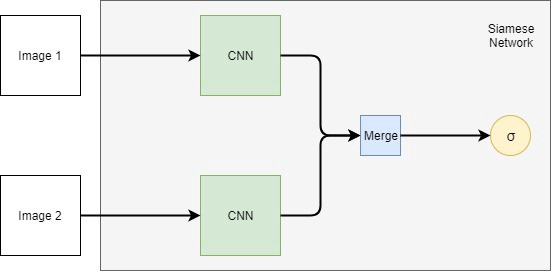

A Siamese Network is a type of network architecture that contains two or more identical subnetworks used to generate feature vectors for each input and compare them.

Siamese Networks can be applied to different use cases, like detecting duplicates, finding anomalies, and face recognition.

This example uses a Siamese Network with two identical subnetworks. We will provide two images to the model, where first  of them will be similar (anchor and positive samples), and the second will be unrelated (anchor and negative.) Our goal is for the model to learn to estimate the similarity between images.



# Download the faces dataset from kaggle 
**CelebFaces** :A popular component of computer vision and deep learning revolves around identifying faces for various applications from logging into your phone with your face or searching through surveillance images for a particular suspect. This dataset is great for training and testing models for face detection, particularly for recognising facial attributes such as finding people with brown hair, are smiling, or wearing glasses. Images cover large pose variations, background clutter, diverse people, supported by a large quantity of images and rich annotations. This data was originally collected by researchers at MMLAB, The Chinese University of Hong Kong (specific reference in Acknowledgment section).

[Dataset Link](https://www.kaggle.com/jessicali9530/celeba-dataset?select=img_align_celeba)

[How to Load Kaggle Datasets Directly into Google Colab](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/)

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jessicali9530/celeba-dataset

 99% 1.32G/1.33G [00:57<00:00, 35.8MB/s]
100% 1.33G/1.33G [00:57<00:00, 24.8MB/s]


In [ ]:
!unzip /content/celeba-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: img_align_celeba/img_align_celeba/197604.jpg  
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/19

# Import libraries 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import model_selection
import glob
import tqdm

# Make pairs
Create function that make pairs from imags with the labels.<br> 
First we make pairs from similar images with label = 1 ,
secondly we make pairs from  non similar images with label = 0 .


In [ ]:
def make_pairs(folder_path):
    # get the images path list using glob

    files_list = glob.glob(folder_path + "/*.jpg")

    # initialize two empty lists to hold the (image, image) pairs

    files_paths_list_1 = []
    files_paths_list_2 = []
    # labels to indicate if a pair is positive or negative
    target_list = []

    # loop over all images
    for path in tqdm.tqdm(files_list):
        # append the similar images path at first
        files_paths_list_1.append(path)
        files_paths_list_2.append(path)
        # append the label of 1 that indicates for similar images
        target_list.append(1)
        # create while loop to make sure that you will not get the similar images pairs
        while True:
            # using numpy random int to get random index for the negative pairs
            n = np.random.randint(low=0, high=len(files_list))
            # make sure the negative image not == to the image path
            if files_list[n] != path:

                # append the non similar images path at first
                files_paths_list_1.append(path)
                files_paths_list_2.append(files_list[n])
                # append the label of 0 that indicates for similar images
                target_list.append(0)
                # exit from the while loop
                break
    # create pandas data frame that have three columns
    data_dict = {
        "images_1": files_paths_list_1,
        "images_2": files_paths_list_2,
        "labels": target_list,
    }
    dataset = pd.DataFrame(data=data_dict)
    return dataset


full_dataset = make_pairs("/content/img_align_celeba/img_align_celeba").iloc[:10000]
full_dataset

100%|██████████| 202599/202599 [00:01<00:00, 198392.62it/s]


,images_1,images_2,labels
0,/content/img_align_celeba/img_align_celeba/090...,/content/img_align_celeba/img_align_celeba/090...,1
1,/content/img_align_celeba/img_align_celeba/090...,/content/img_align_celeba/img_align_celeba/193...,0
2,/content/img_align_celeba/img_align_celeba/083...,/content/img_align_celeba/img_align_celeba/083...,1
3,/content/img_align_celeba/img_align_celeba/083...,/content/img_align_celeba/img_align_celeba/064...,0
4,/content/img_align_celeba/img_align_celeba/134...,/content/img_align_celeba/img_align_celeba/134...,1
...,...,...,...
9995,/content/img_align_celeba/img_align_celeba/106...,/content/img_align_celeba/img_align_celeba/141...,0
9996,/content/img_align_celeba/img_align_celeba/065...,/content/img_align_celeba/img_align_celeba/065...,1
9997,/content/img_align_celeba/img_align_celeba/065...,/content/img_align_celeba/img_align_celeba/026...,0
9998,/content/img_align_celeba/img_align_celeba/091...,/content/img_align_celeba/img_align_celeba/091...,1


#Split the data into train and test sets

In [ ]:
train, test = model_selection.train_test_split(
    full_dataset, test_size=0.1, random_state=42, stratify=full_dataset.labels
)

In [ ]:
train

,images_1,images_2,labels
8894,/content/img_align_celeba/img_align_celeba/176...,/content/img_align_celeba/img_align_celeba/176...,1
3626,/content/img_align_celeba/img_align_celeba/066...,/content/img_align_celeba/img_align_celeba/066...,1
6173,/content/img_align_celeba/img_align_celeba/198...,/content/img_align_celeba/img_align_celeba/005...,0
852,/content/img_align_celeba/img_align_celeba/168...,/content/img_align_celeba/img_align_celeba/168...,1
1081,/content/img_align_celeba/img_align_celeba/192...,/content/img_align_celeba/img_align_celeba/181...,0
...,...,...,...
8200,/content/img_align_celeba/img_align_celeba/093...,/content/img_align_celeba/img_align_celeba/093...,1
322,/content/img_align_celeba/img_align_celeba/178...,/content/img_align_celeba/img_align_celeba/178...,1
3948,/content/img_align_celeba/img_align_celeba/051...,/content/img_align_celeba/img_align_celeba/051...,1
7383,/content/img_align_celeba/img_align_celeba/122...,/content/img_align_celeba/img_align_celeba/017...,0


#Create data pipeline 

In [ ]:
def read_image(x, y):
    x1, x2 = x
    # read_image function that reads images from the paths
    # read image for x1 path
    x1 = tf.io.read_file(x1)

    # decode the image to jpeg for x1
    x1 = tf.image.decode_jpeg(x1, channels=3)

    # This will convert to float values in [0, 1]for x1
    x1 = tf.image.convert_image_dtype(x1, tf.float32)

    # resize images to target model size for x1
    x1 = tf.image.resize(x1, [224, 224])

    # make sure the pixel values are between 0,1 for x1
    x1 = tf.clip_by_value(x1, clip_value_min=0, clip_value_max=1)

    # read image for x2 path
    x2 = tf.io.read_file(x2)

    # decode the image to jpeg for x2
    x2 = tf.image.decode_jpeg(x2, channels=3)

    # This will convert to float values in [0, 1] for x2
    x2 = tf.image.convert_image_dtype(x2, tf.float32)

    # resize images to target model size for x1
    x2 = tf.image.resize(x2, [224, 224])

    # make sure the pixles value are between 0,1 for x1
    x2 = tf.clip_by_value(x2, clip_value_min=0, clip_value_max=1)

    return (x1, x2), y


def train_preprocess(x, y):
    x1, x2 = x

    # train_preprocess apply data augmentation from the training images
    # data augmentation for x1
    x1 = tf.image.random_flip_left_right(x1)
    x1 = tf.image.random_brightness(x1, max_delta=32.0 / 255.0)
    x1 = tf.image.random_saturation(x1, lower=0.5, upper=1.5)

    # Make sure the image is still in [0, 1]
    x1 = tf.clip_by_value(x1, 0.0, 1.0)

    # data augmentation for x2
    x2 = tf.image.random_flip_left_right(x2)
    x2 = tf.image.random_brightness(x2, max_delta=32.0 / 255.0)
    x2 = tf.image.random_saturation(x2, lower=0.5, upper=1.5)

    # Make sure the image is still in [0, 1]
    x2 = tf.clip_by_value(x2, 0.0, 1.0)

    return (x1, x2), y

In [ ]:
# create the data pipline
def dataset_creater(x1, x2, y, training=False):
    data = tf.data.Dataset.from_tensor_slices(((x1, x2), y))
    data = data.shuffle(1028)
    data = data.map(
        read_image, num_parallel_calls=tf.data.AUTOTUNE
    )  # read images from paths

    if training:
        # apply data augmentation
        data = data.map(train_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    data = data.batch(32)
    data = data.prefetch(tf.data.AUTOTUNE)
    return data


# create the train data pipline
train_dataset = dataset_creater(
    train.images_1, train.images_2, train.labels, training=True
)
# create the test data pipline

test_dataset = dataset_creater(test.images_1, test.images_2, test.labels)

#Plot the samples 

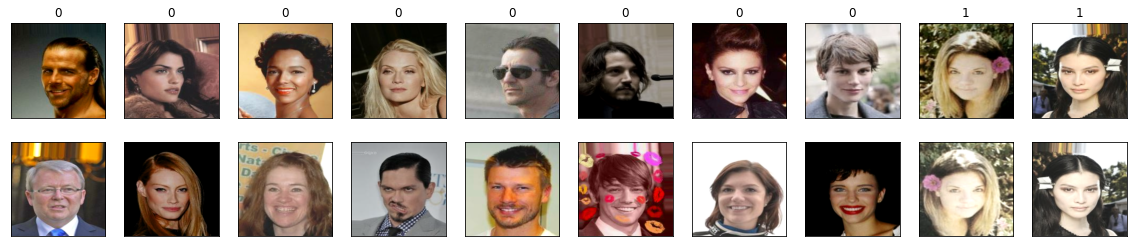

In [ ]:
n = 10
plt.figure(figsize=(20, 4))

for x, y in train_dataset.take(1):
    x1, x2 = x

    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.title(f"{y[i]}")
        plt.imshow(tf.squeeze(x1[i]))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        bx = plt.subplot(2, n, n + i + 1)

        plt.imshow(tf.squeeze(x2[i]))
        plt.gray()
        bx.get_xaxis().set_visible(False)
        bx.get_yaxis().set_visible(False)


plt.show()

## Loading Pretrained CNN Model

The usual workflow for transfer learning is the following: 

1. Freeze all layers in the base model by setting trainable = False.
2. Create a new model on top of the output of one (or several) layers from the base model.
3. Train your new model on your new dataset.


Note that an alternative, more lightweight workflow could also be:

1. Instantiate a base model and load pre-trained weights into it.
2. Run your new dataset through it and record the output of one (or several) layers from the base model. This is called feature extraction.
3. Use that output as input data for a new, smaller model.

An issue with that workflow, though, is that it doesn't allow you to dynamically modify the input data of your new model during training, which is required when doing data augmentation, for instance. Transfer learning is typically used for tasks when your new dataset has too little data to train a full-scale model from scratch, and in such scenarios data augmentation is very important. So in what follows, we will focus on the first workflow.

In TensorFlow, we'll start by loading the pretrained model from `tf.keras.applications` API, a full list of available pretrained models can be found here: https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [ ]:
cnn_model = tf.keras.applications.DenseNet121(
    include_top=False, input_shape=(224, 224, 3)
)

cnn_model.summary()
print(len(cnn_model.layers))

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_39 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_39[0][0]']               
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                       

In [ ]:
# freeze the cnn model
cnn_model.trainable = False
cnn_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_39 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_39[0][0]']               
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                       

In [ ]:
class EuclideanDistance(tf.keras.layers.Layer):
    def __init__(self):
        super(EuclideanDistance, self).__init__()

    def call(self, vectors):
        # unpack the vectors into separate lists
        (featsA, featsB) = vectors
        # compute the sum of squared distances between the vectors
        sumSquared = tf.keras.backend.sum(
            tf.keras.backend.square(featsA - featsB), axis=1, keepdims=True
        )
        # return the euclidean distance between the vectors
        return tf.keras.backend.sqrt(
            tf.keras.backend.maximum(sumSquared, tf.keras.backend.epsilon())
        )

#Create the Siamese Model


In [ ]:
class SiameseModel(tf.keras.Model):
    def __init__(self, cnn_model):
        super(SiameseModel, self).__init__()
        # initializes the cnn model for feature extracting
        self.cnn_model = cnn_model
        # first Dense layer
        self.D1 = tf.keras.layers.Dense(512, use_bias=False)
        # batch normalization to normalizing the output of D1
        self.BN_1 = tf.keras.layers.BatchNormalization()
        # second Dense layer
        self.D2 = tf.keras.layers.Dense(128, use_bias=False)
        # batch normalization to normalizing the output of D2
        self.BN_2 = tf.keras.layers.BatchNormalization()

        # dense layer with sigmoid activation function
        self.out = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)

    def call(self, inputs):
        x1, x2 = inputs
        # x1 is the first image
        # x2 is the seconde image that has a possibility that it looks like the original x1 or not

        # path 1
        # get the x1 feature vector from the cnn model
        x1 = self.cnn_model(x1)

        x1 = tf.keras.layers.GlobalAveragePooling2D()(x1)
        # path 2
        # get the x2 feature vector from the cnn model

        x2 = self.cnn_model(x2)
        x2 = tf.keras.layers.GlobalAveragePooling2D()(x2)

        # concatenate the to vectors of x1 with x2
        x = tf.keras.layers.concatenate([x1, x2])

        x = self.D1(x)
        x = self.BN_1(x)
        x = tf.nn.leaky_relu(x)
        x = self.D2(x)
        x = self.BN_2(x)
        x = tf.nn.leaky_relu(x)

        out = self.out(x)

        return out

    def build_model(self, dim=[224, 224, 3]):
        x = (tf.keras.layers.Input(dim), tf.keras.layers.Input(dim))
        return tf.keras.Model(inputs=[x], outputs=[self.call(x)])


model = SiameseModel(cnn_model=cnn_model)
model.build_model(dim=[224, 224, 3]).summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_46 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_47 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 densenet121 (Functional)       (None, 7, 7, 1024)   7037504     ['input_46[0][0]',               
                                                                  'input_47[0][0]']        

In [ ]:
# build the model
x = (tf.keras.layers.Input([224, 224, 3]), tf.keras.layers.Input([224, 224, 3]))
model(x)
model.summary()

Model: "siamese_model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 dense_30 (Dense)            (None, 512)               1048576   
                                                                 
 batch_normalization_20 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_31 (Dense)            (None, 128)               65536     
                                                                 
 batch_normalization_21 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_32 (Dense)            (None, 1)            

##Plot the model 

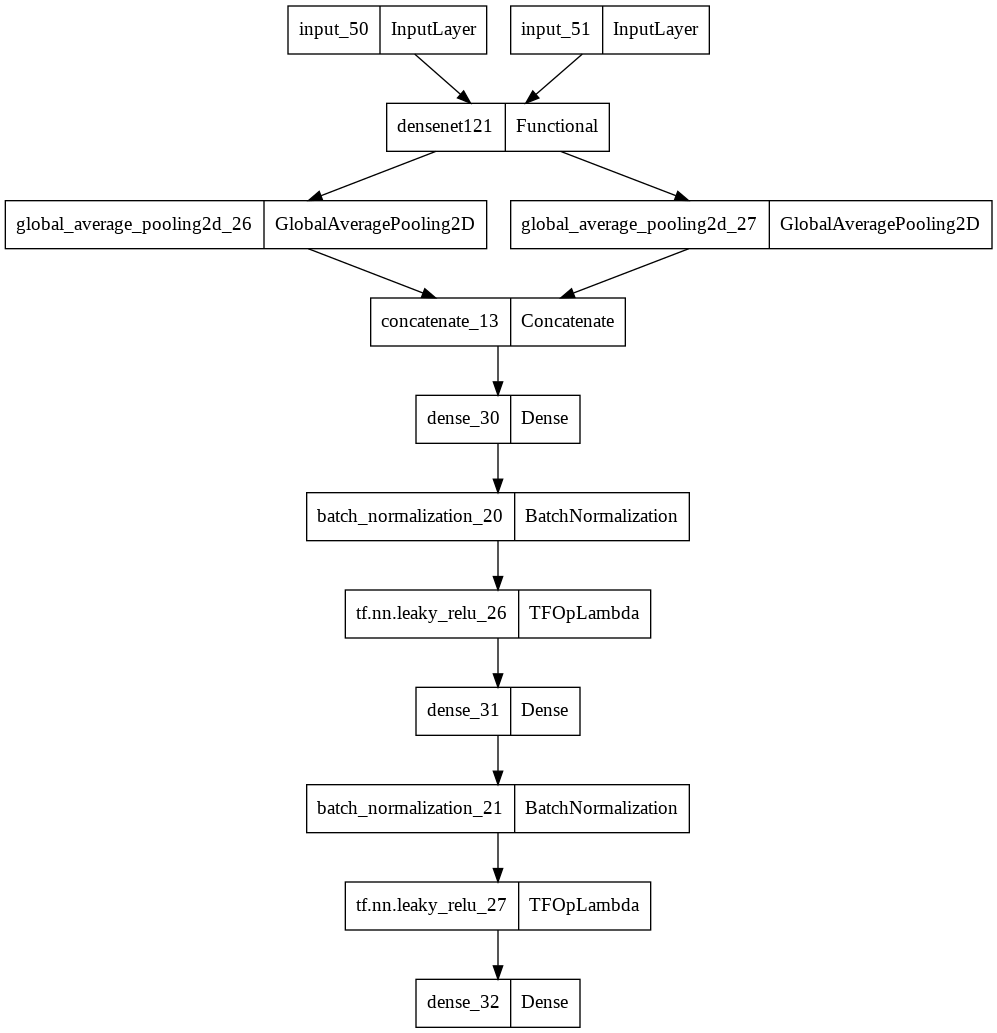

In [ ]:
tf.keras.utils.plot_model(model.build_model(dim=[224, 224, 3]))

#Define the Loss function and the optimizer

In [ ]:
loss_object = tf.losses.BinaryCrossentropy()

optimizer = tf.optimizers.Adam()

# Train the model 

In [ ]:
model.compile(optimizer=optimizer, loss=loss_object, metrics=["acc"])

In [ ]:
model.fit(train_dataset, epochs=2, validation_data=test_dataset)

Epoch 1/2
282/282 [==============================] - 159s 514ms/step - loss: 0.2753 - acc: 0.8916 - val_loss: 0.1420 - val_acc: 0.9610
Epoch 2/2
282/282 [==============================] - 141s 500ms/step - loss: 0.0986 - acc: 0.9653 - val_loss: 0.0331 - val_acc: 0.9910
